<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%204/Flu_Data_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.EDA**

               Age  neutrophil  serumLevelsOfWhiteBloodCell  lymphocytes  \
count  1454.000000  103.000000                   151.000000   156.000000   
mean     26.471040    6.854078                     6.885159     1.850154   
std      21.487982   12.690131                     4.346668     3.956668   
min       0.000000    0.446000                     0.500000     0.130000   
25%       7.000000    2.160000                     3.995000     0.637500   
50%      24.000000    3.310000                     5.690000     0.905500   
75%      42.000000    6.645000                     9.155000     1.605000   
max      88.000000   93.000000                    36.070000    30.600000   

       DurationOfIllness  Temperature  
count          87.000000   628.000000  
mean           13.988506    38.068312  
std             9.043171     1.094468  
min             1.000000    35.722222  
25%             7.000000    37.222222  
50%            12.000000    38.000000  
75%            20.000000    38.7222

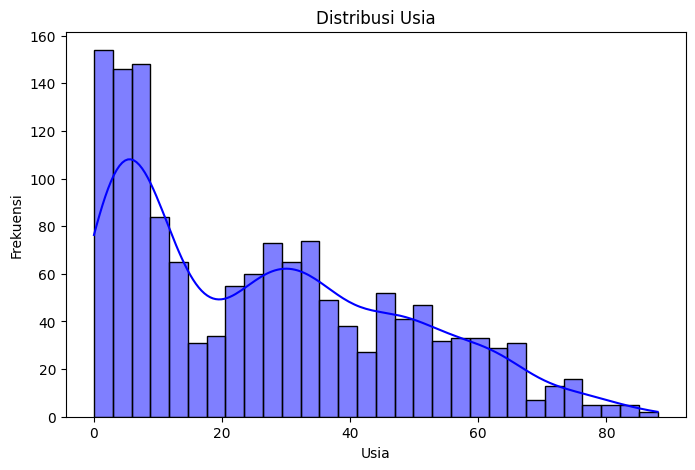

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/flu.csv")

# Menampilkan statistik deskriptif untuk fitur numerik
print(df.describe())

# Visualisasi distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()


## **2. Handling Missing Values**

In [3]:
# Mengisi missing values dengan median untuk numerik dan modus untuk kategorikal
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


## **3. Encoding Data Kategorikal**

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())


   Diagnosis  InitialPCRDiagnosis   Age  Sex  neutrophil  \
0          1                    1  67.0    0        3.31   
1          1                    1  29.0    1        3.31   
2          1                    1  22.0    0        3.31   
3          1                    1  20.0    0        3.31   
4          1                    1  21.0    1        3.31   

   serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                         5.69       0.9055                       2   
1                         5.69       0.9055                       2   
2                         5.69       0.9055                       2   
3                         5.69       0.9055                       2   
4                         5.69       0.9055                       2   

   DurationOfIllness  CTscanResults  RiskFactors  GroundGlassOpacity  \
0               12.0              1           22                   1   
1               12.0              1           22                   1

## **4. Evaluasi Model dengan Metrik**

In [11]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Pastikan probabilitas hanya untuk kelas positif
y_pred_proba_positive = y_pred_proba[:, 1]
auc = roc_auc_score(y_test, y_pred_proba_positive, multi_class="ovr")

# Cetak hasil evaluasi
print(f"Akurasi: {accuracy}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")


Akurasi: 0.8922558922558923
Presisi: 0.8912123550060287
Recall: 0.8922558922558923
F1-Score: 0.8915470494417863
AUC: 0.8643585614600109


## **5. Penjelasan Matematika**

1. Akurasi
Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan total jumlah data.

         Akurasi= TP+TN/TP+TN+FP+FN

*   TP (True Positive): Prediksi benar untuk kelas positif.
*   TN (True Negative): Prediksi benar untuk kelas negatif.
*   FP (False Positive): Salah mengklasifikasikan negatif sebagai positif.
*   FN (False Negative): Salah mengklasifikasikan positif sebagai negatif.

2. Presisi
presisi mengukur berapa proporsi dari prediksi yang benar-benar positif.


                   Presisi= TP/TP+FP

presisi penting jika false positive harus diminimalkan, misalnya dalam diagnosis penyakit.

3. Recall
recall mengukur seberapa baik model menemukan semua sampel positif dalam dataser.

              Recall= TP/TP+FN

recall tinggi berarti model mendetekeksi kasus positif.

4. F1-Score

F1-Score adalah rata-rata harmonis antara presisi dan recall.

            F1=2× Presisi×Recall/Presisi+Recall

5. AUC-ROC

AUC-ROC mengukur seberapa baik model dapat membedakan antara kelas positif dan negatif.

*   ROC Curve: Plot antara True Positive Rate (TPR) dan False Positive Rate (FPR).
*   AUC (Area Under Curve): Luas di bawah kurva ROC. Semakin tinggi nilai AUC, semakin baik model dalam membedakan kelas.

persamaan TPR dan FPR adalah

                   TPR=  TP/TP+FN

                    FPR= FP/FP+TN



Nilai AUC:

* 0.5 → Model tidak lebih baik dari tebak-tebakan.
* 0.7-0.8 → Model cukup baik.
* 0.8-0.9 → Model sangat baik.
* 0.9-1.0 → Model hampir sempurna.




